In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics
import pandas_profiling

df = pd.read_csv('/Users/23behmen_t/Downloads/Columbia_CLI.csv', index_col=0)

# Data Cleaning

,Total,Percent
inq_last_12m,999,100.000000
total_bal_il,999,100.000000
mths_since_last_major_derog,999,100.000000
annual_inc_joint,999,100.000000
dti_joint,999,100.000000
verification_status_joint,999,100.000000
tot_coll_amt,999,100.000000
tot_cur_bal,999,100.000000
open_il_6m,999,100.000000
open_il_12m,999,100.000000


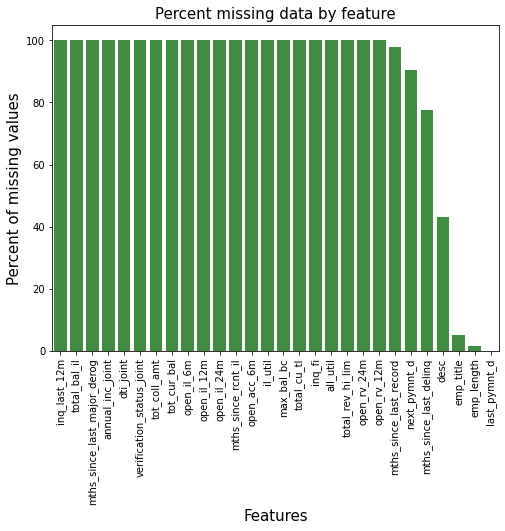

In [121]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(df)

,Total,Percent
next_pymnt_d,905,90.590591
mths_since_last_delinq,774,77.477477
desc,432,43.243243
emp_title,51,5.105105
emp_length,17,1.701702
last_pymnt_d,1,0.100100


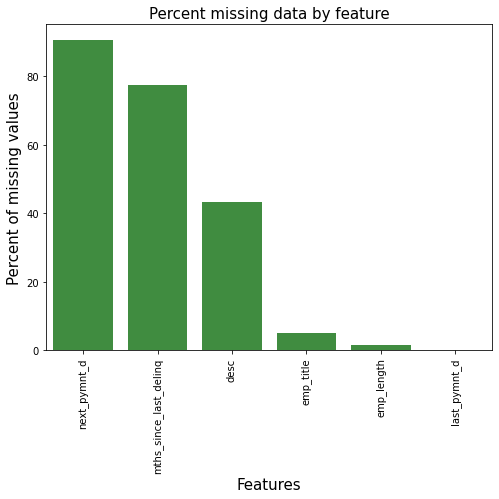

In [122]:
#Coding this to find and then delete all of the columns which were 100% NaN
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([percent], axis=1, keys=['Percent'])
ms = ms.loc[ms['Percent'] > 95]
deletables = ms.index
DF = df.drop(list(deletables), axis = 1)
missingdata(DF)
# dm = ms.loc[ms['Percent'] ==100].count
# dm
    

In [123]:
#Dropping the lists with nulls that are irrelevant, ex: next payment day is not gonna conclude the total int_rate
extra_drops = ['next_pymnt_d','desc']
DF = DF.drop(list(extra_drops), axis = 1)
DF

,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,...,0.00,0.00,0.00,15-Jan,171.62,16-Jan,0,1,INDIVIDUAL,0
1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0,1,INDIVIDUAL,0
1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,...,0.00,0.00,0.00,14-Jun,649.91,16-Jan,0,1,INDIVIDUAL,0
1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,16.97,0.00,0.00,15-Jan,357.48,15-Jan,0,1,INDIVIDUAL,0
1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,...,0.00,0.00,0.00,16-Jan,67.79,16-Jan,0,1,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057818,1289186,7000,36 months,8.90,222.28,A,A5,Harvard University,5 years,OWN,...,0.00,0.00,0.00,14-Dec,229.64,14-Dec,0,1,INDIVIDUAL,0
1057629,1289394,2425,36 months,15.27,84.39,C,C4,Lime Energy,3 years,OWN,...,15.00,0.00,0.00,15-Jan,16.06,15-Jul,0,1,INDIVIDUAL,0
1057621,1289385,6950,36 months,9.91,223.97,B,B1,Real Mex Foods,2 years,RENT,...,0.00,0.00,0.00,12-Sep,1560.92,14-Apr,0,1,INDIVIDUAL,0


,Total,Percent
mths_since_last_delinq,774,77.477477
emp_title,51,5.105105
emp_length,17,1.701702
last_pymnt_d,1,0.100100


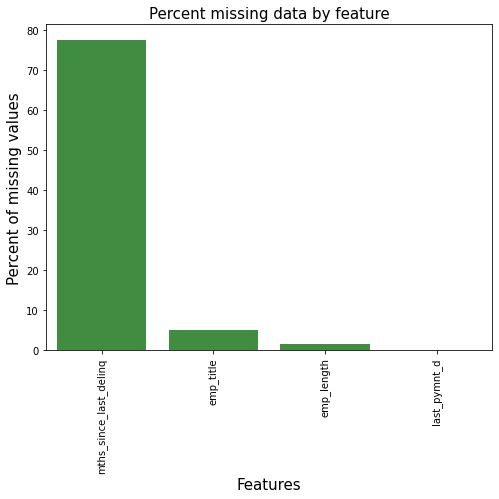

In [124]:
missingdata(DF)



In [125]:
DF['mths_since_last_delinq'].fillna(DF['mths_since_last_delinq'].mode()[0], inplace = True)
DF['emp_title'].fillna(DF['emp_title'].mode()[0], inplace = True)
DF['emp_length'].fillna(DF['emp_length'].mode()[0], inplace = True)
DF['last_pymnt_d'].fillna(DF['last_pymnt_d'].mode()[0], inplace = True)

all nulls gone


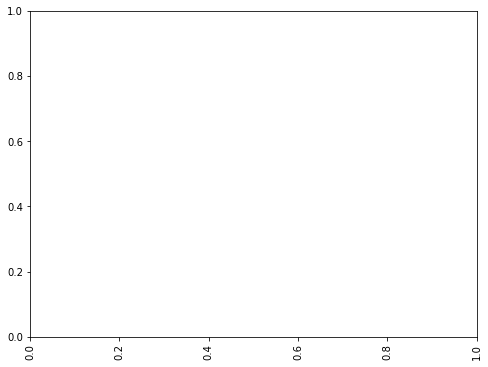

In [126]:
try:
    missingdata(DF)
except:
    print("all nulls gone")